<a href="https://colab.research.google.com/github/vladimirmc/alure-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#tiendas = {'Tienda 1 ':tienda, 'Tienda 2 ':tienda2, 'Tienda 3 ':tienda3, 'Tienda 4':tienda4}

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación
###Calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.


In [ ]:
# INGRESO TOTAL POR CADA TIENDA

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_totales = []
print("\n   ** Ingresos Totales por Tienda **\n")
for i, tienda in enumerate(tiendas):
    nombre_tienda = nombres_tiendas[i]
    total_venta_tienda = tienda['Precio'].sum()
    ingresos_totales.append(total_venta_tienda)
    print(f"Total de Ventas {nombre_tienda} es: ${total_venta_tienda:,.2f}")
print(f'\nTotal Ingresos: ${sum(ingresos_totales):,.2f}')




   ** Ingresos Totales por Tienda **

Total de Ventas Tienda 1 es: $1,150,880,400.00
Total de Ventas Tienda 2 es: $1,116,343,500.00
Total de Ventas Tienda 3 es: $1,098,019,600.00
Total de Ventas Tienda 4 es: $1,038,375,700.00

Total Ingresos: $4,403,619,200.00


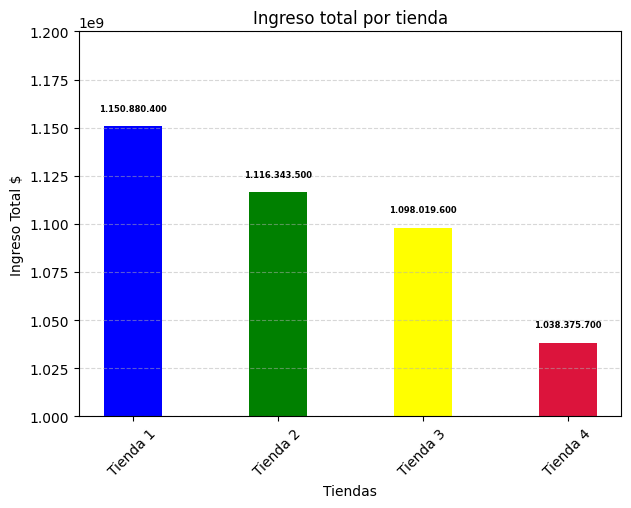

In [ ]:
# Crear Gráfico de Barras
plt.figure(figsize=(7, 5))
colores = ['blue', 'green', 'yellow', 'crimson']
plt.bar(x=nombres_tiendas, height=ingresos_totales, color=colores, width=0.4, align='center')
plt.title('Ingreso total por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingreso Total $')
plt.ylim(1000000000, 1200000000)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, ingreso in enumerate(ingresos_totales):
    texto = f"{ingreso:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")
    plt.text(i, ingreso + max(ingresos_totales)*0.01, texto, ha='center', va='top', color='black', fontsize=6, fontweight='bold')
plt.show()


# 2. Ventas por categoría
###Calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [ ]:
print('\n   ** Ventas por Categoría por Tienda **\n')
totales_ventas = []
def ventas_por_categoria(tienda,nro):
  ventas_por_categoria_tienda = tienda.groupby('Categoría del Producto')['Precio'].sum()
  totales_ventas.append(ventas_por_categoria_tienda)
  print(f'Tienda {nro} {ventas_por_categoria_tienda}\n')

ventas_por_categoria(tienda,1)
ventas_por_categoria(tienda2,2)
ventas_por_categoria(tienda3,3)
ventas_por_categoria(tienda4,4)
print(f'\nTotal Ventas: {totales_ventas[0]}')


   ** Ventas por Categoría por Tienda **

Tienda 1 Categoría del Producto
Artículos para el hogar     15074500.0
Deportes y diversión        33350100.0
Electrodomésticos          283260200.0
Electrónicos               409476100.0
Instrumentos musicales      75102400.0
Juguetes                    20262200.0
Libros                       9321300.0
Muebles                    192528900.0
Name: Precio, dtype: float64

Tienda 2 Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Tienda 3 Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicale

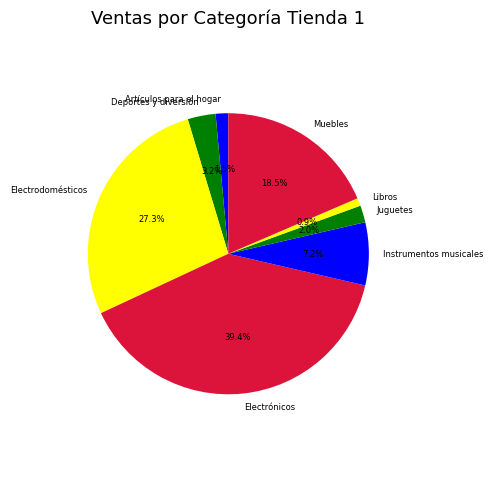

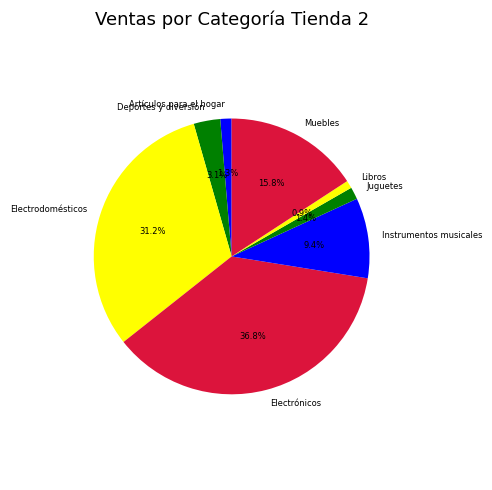

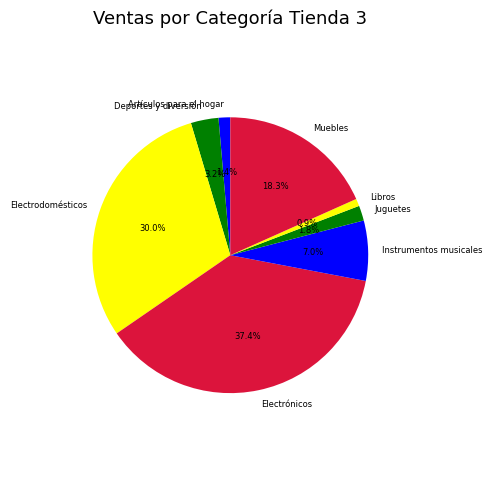

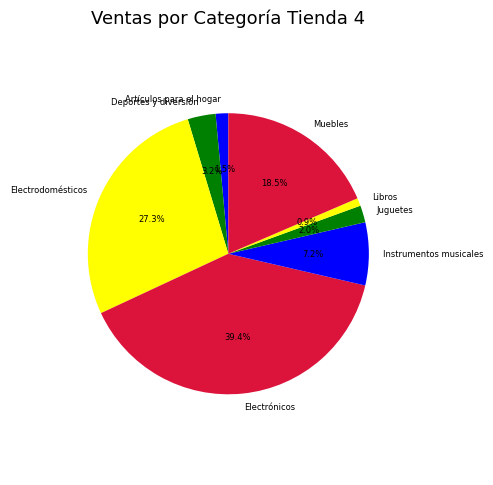

In [ ]:
# Preparar datos para el gráfico de pastel
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['blue', 'green', 'yellow', 'crimson']
# Crear el gráfico de pastel
for i, ventas in enumerate(totales_ventas):
  plt.figure(figsize=(5, 5))
  plt.pie(ventas, labels=ventas.keys(), colors=colores, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 6, 'fontfamily': 'sans-serif'})
  plt.title(f'Ventas por Categoría {nombres_tiendas[i]}', fontsize=13)
  plt.axis('equal')
  plt.tight_layout()
  plt.show()


# 3. Calificación promedio de la tienda

### Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificacion = []
print('\n   ** Calificación Promedio de las Tiendas **\n')
for i, tienda in enumerate(tiendas):
    nombre_tienda = nombres_tiendas[i]
    calificacion_promedio_tienda =  round(tienda['Calificación'].mean(),2)
    calificacion.append(calificacion_promedio_tienda)
    print(f"La calificación promedio de la {nombre_tienda} es: {calificacion_promedio_tienda:.2f}")



   ** Calificación Promedio de las Tiendas **

La calificación promedio de la Tienda 1 es: 3.98
La calificación promedio de la Tienda 2 es: 4.04
La calificación promedio de la Tienda 3 es: 4.05
La calificación promedio de la Tienda 4 es: 4.00


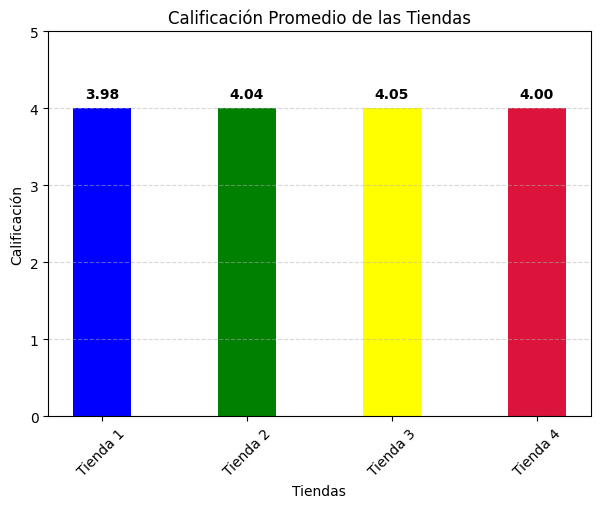

In [ ]:
# Crear Gráfico de Barras
plt.figure(figsize=(7, 5))
colores = ['blue', 'green', 'yellow', 'crimson']
barras = plt.bar(x=nombres_tiendas, height=calificacion_promedio_tienda, color=colores, width=0.4, align='center')
plt.title('Calificación Promedio de las Tiendas')
plt.xlabel('Tiendas')
plt.ylabel('Calificación')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, barra in enumerate(barras):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 0.1, f'{calificacion[i]:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

# 4. Productos más y menos vendidos
###Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.


   ** Productos más y menos vendidos por Tienda **


Tienda 1:
El producto más vendido es Microondas con 60 unidades vendidas
El producto menos vendido es Auriculares con micrófono con 33 unidades vendidas


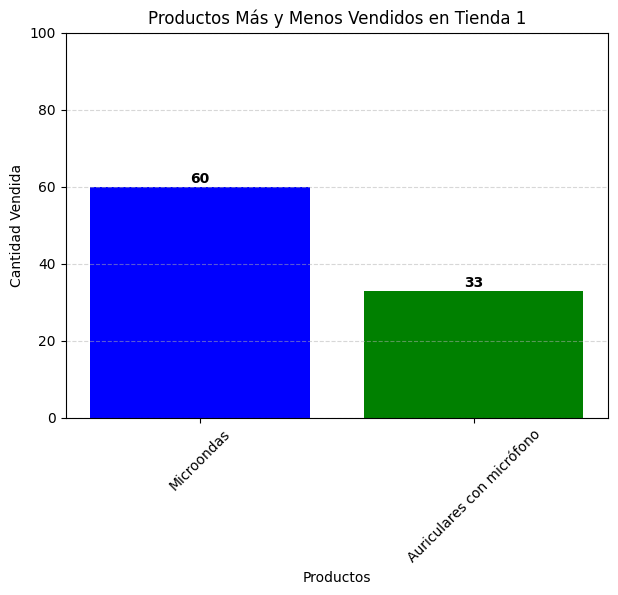


Tienda 2:
El producto más vendido es Iniciando en programación con 65 unidades vendidas
El producto menos vendido es Juego de mesa con 32 unidades vendidas


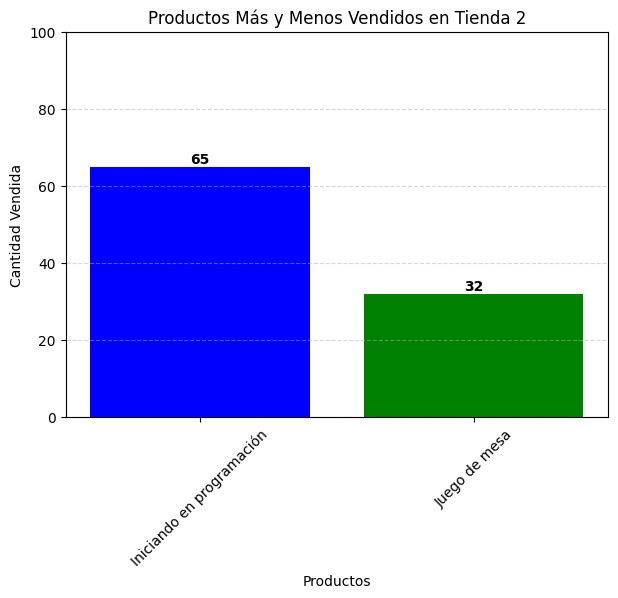


Tienda 3:
El producto más vendido es Kit de bancas con 57 unidades vendidas
El producto menos vendido es Bloques de construcción con 35 unidades vendidas


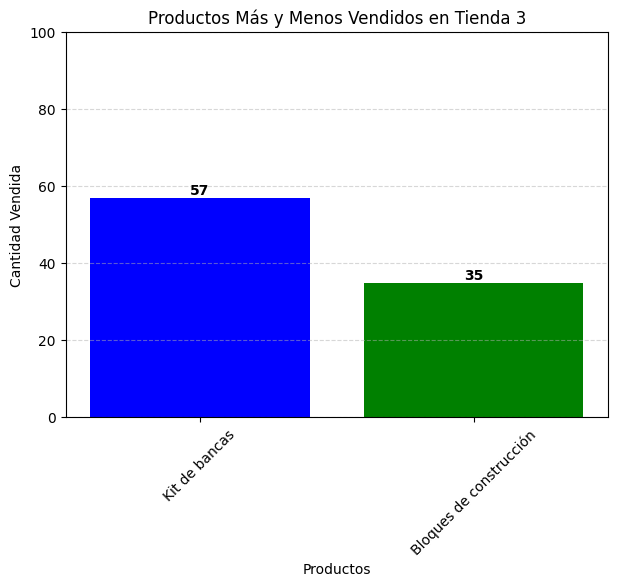


Tienda 4:
El producto más vendido es Cama box con 62 unidades vendidas
El producto menos vendido es Guitarra eléctrica con 33 unidades vendidas


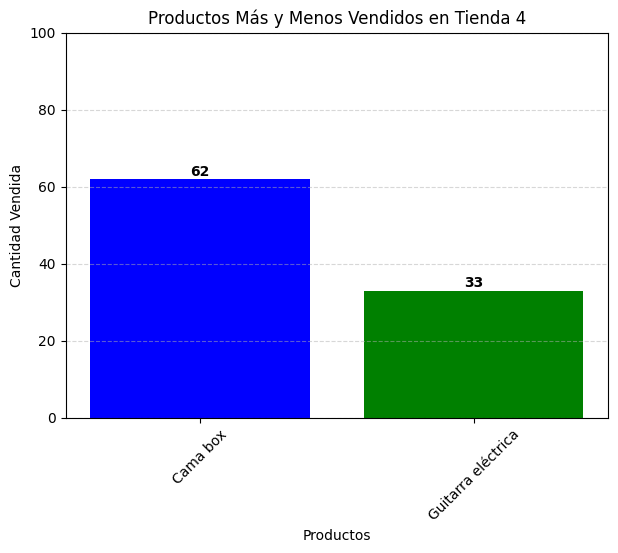

In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['blue', 'green', 'yellow', 'crimson']
print('\n   ** Productos más y menos vendidos por Tienda **\n')
for i, tienda in enumerate(tiendas):
    nombre_tienda = nombres_tiendas[i]

    # Contar productos vendidos
    productos_vendidos = tienda['Producto'].value_counts()

    # Producto más vendido
    producto_mas_vendido = productos_vendidos.idxmax()
    cantidad_mas_vendido = productos_vendidos.max()

    # Producto menos vendido
    producto_menos_vendido = productos_vendidos.idxmin()
    cantidad_menos_vendido = productos_vendidos.min()

    print(f'\n{nombre_tienda}:')
    print(f'El producto más vendido es {producto_mas_vendido} con {cantidad_mas_vendido} unidades vendidas')
    print(f'El producto menos vendido es {producto_menos_vendido} con {cantidad_menos_vendido} unidades vendidas')
    colores = ['blue', 'green', 'yellow', 'crimson']
    plt.figure(figsize=(7, 5))
    plt.xticks(rotation=45)
    barras1 = plt.bar(producto_mas_vendido,cantidad_mas_vendido,color=colores[0])
    plt.title(f'Productos Más y Menos Vendidos en {nombre_tienda}')
    plt.ylabel('Cantidad Vendida')
    plt.xlabel('Productos')
    plt.ylim(0, 100)
    barras2 = plt.bar(producto_menos_vendido,cantidad_menos_vendido,color=colores[1])
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    for i, barra in enumerate(barras1):
       altura = barra.get_height()
       plt.text(barra.get_x() + barra.get_width() / 2, altura + 0.1, f'{cantidad_mas_vendido:.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, barra in enumerate(barras2):
       altura = barra.get_height()
       plt.text(barra.get_x() + barra.get_width() / 2, altura + 0.1, f'{cantidad_menos_vendido:.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.show()



# 5. Envío promedio por tienda
###Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda


   ** Costo de Envío promedio por Tienda **

El Costo de Envío promedio de la Tienda 1 es: $26018.61
El Costo de Envío promedio de la Tienda 2 es: $25216.24
El Costo de Envío promedio de la Tienda 3 es: $24805.68
El Costo de Envío promedio de la Tienda 4 es: $23459.46


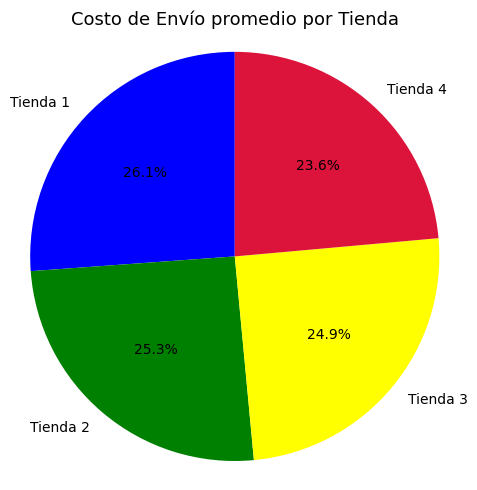

In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['blue', 'green', 'yellow', 'crimson']
envio_promedio = []
print('\n   ** Costo de Envío promedio por Tienda **\n')
for i, tienda in enumerate(tiendas):
    nombre_tienda = nombres_tiendas[i]
    envio_promedio_tienda = tienda['Costo de envío'].mean()
    envio_promedio.append(envio_promedio_tienda)
    print(f"El Costo de Envío promedio de la {nombre_tienda} es: ${envio_promedio_tienda:.2f}")

plt.figure(figsize=(5, 5))
plt.pie(envio_promedio, labels=nombres_tiendas, colors=colores, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 10, 'fontfamily': 'sans-serif'})
plt.title('Costo de Envío promedio por Tienda', fontsize=13)
plt.axis('equal')
plt.tight_layout()
plt.show()


## Análisis de los resultados obtenidos:

A partir de un análisis realizado mediante Python, se evalúa el desempeño general de las ventas de cuatro tiendas propiedad del señor Juan. Este informe tiene como propósito guiar al cliente en la elección de la tienda más estratégica para vender y, de este modo, financiar sus proyectos.

Para ello, se analizaron de forma exhaustiva los siguientes aspectos: las ventas totales, la gama de productos y la calificación de la experiencia del cliente.

Las conclusiones finales evalúan la conveniencia de una posible venta y exploran alternativas viables.

A continuación, se describen los factores analizados a lo largo del proceso:

##1. Ingresos totales de las tiendas

 La tienda 4 presenta un menor desempeño en comparación con las otras tres tiendas. En particular, se registra una diferencia de facturación aproximada de $112.504.700 respecto a la tienda con mayores ganancias (tienda 1).

##2. Ventas por Categorías

Los ingresos totales por categoría, expresados como porcentaje del total, lo cual se refleja en el gráfico.
Se observa que las tres categorías predominantes en todas las tiendas son:

Electrónicos
Electrodomésticos
Muebles

Al considerar únicamente estas tres categorías, los porcentajes de facturación para cada tienda son los siguientes:

Tienda 1: 85.2%
Tienda 2: 83.8%
Tienda 3: 85.7%
Tienda 4: 85.2%

Esto indica que, en términos de ingresos, todas las tiendas presentan un desempeño similar. No obstante, la tienda 2 muestra una leve menor dependencia de estas tres categorías.

##3. Calificaciones promedio de los clientes por tienda

Se observa que la tienda 1 presenta la evaluación global más baja, con un promedio de 3.98, mientras que la tienda 3 obtiene la mejor calificación, con un promedio de 4.05.

##4. Productos más y menos vendidos

Se realizó un análisis de los productos más y menos vendidos en cada tienda.

En general, se observa que los artículos más vendidos de las tiendas 3 y 4 son productos pertenecientes a las categorías de Muebles.
Para tienda 1 el producto más vendido es electrodomestico.
En el caso de la tienda 2, dentro del artículo más vendidos son los  Libros.

Los productos menos vendidos de las tiendas 1 y 4 corresponden a la categoría de los electronicos.

Por su parte, en la tienda 2 y 3 se observa que la categoría de Juegos y Construccion son los productos menos vendidos respectivamente.

##5. Costo de envío promedio por tienda
Se realizó un análisis del costo promedio de envío en todas las tiendas.

En primer lugar, se observó que la tienda 1 reporta el mayor costo total de envíos. Esto da lugar a dos posibles hipótesis:

Que el elevado costo esté relacionado con el alto volumen de ventas de esta tienda.
Que los artículos más vendidos, pertenecientes a las categorías de Electrónicos, Muebles y Electrodomésticos, generen mayores costos de envío debido a sus dimensiones y peso.
Por otro lado, al analizar los costos de envío promedio, se destaca que la tienda 4 presenta el valor más bajo. Este resultado podría deberse a una menor cantidad de ventas en la categoría de electrodomésticos.

Conclusión
Con base en el análisis integral realizado, se presentan las siguientes conclusiones:

Las tiendas 2 y 3 muestran un desempeño sólido y consistente, con un alto nivel de ventas, buenas calificaciones por parte de los clientes, diversidad en las categorías de productos vendidos y costos de envío razonables. Por tanto, se recomienda mantener su operación como parte de la estrategia comercial del Señor Juan.

En el caso de la tienda 1, aunque presenta el mayor volumen de ventas y ganancias totales, también registra las calificaciones promedio más bajas y los costos de envío más altos. Esto podría deberse a que fue la primera tienda establecida o a que maneja un volumen logístico más complejo. Sin embargo, estos factores afectan la percepción del cliente y la rentabilidad. Se sugiere realizar un diagnóstico profundo para identificar la causa raíz del bajo nivel de satisfacción y los altos costos.

La tienda 4 muestra el menor nivel de ganancias, principalmente por una baja participación de la categoría de electrodomésticos. A pesar de ello, mantiene un desempeño comparable al de las tiendas 2 y 3 en cuanto a calificaciones y costos de envío, destacándose incluso por tener el menor costo promedio.

En resumen, el menor nivel de ganancias es primordial para la decicisón final. Por ello, se sugiere al Señor Juan considerar la posibilidad de prescindir de la tienda 4, siempre y cuando no se implementen medidas correctivas que reviertan las tendencias negativas observadas.